In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
train=pd.read_csv('/content/drive/MyDrive/train.csv')

In [4]:
test=pd.read_csv('/content/drive/MyDrive/test.csv')

In [5]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
test.shape

(127037, 11)

In [11]:
train.shape

(381109, 12)

In [12]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [13]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [14]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [15]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

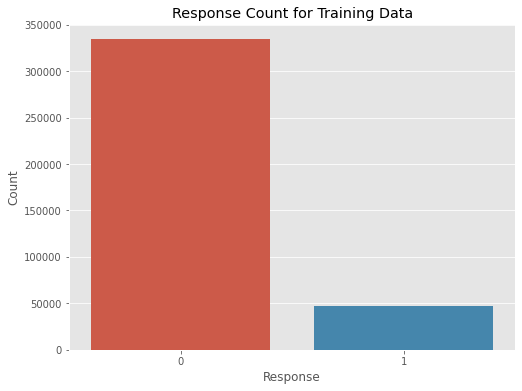

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(train['Response'])
plt.title('Response Count for Training Data')
plt.xlabel('Response')
plt.ylabel('Count')

In [17]:
train['Gender']=train['Gender'].map({'Male':1,'Female':0})
train['Vehicle_Age']=train['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
train['Vehicle_Damage']=train['Vehicle_Damage'].map({'Yes':1,'No':0})

In [18]:
test['Gender']=test['Gender'].map({'Male':1,'Female':0})
test['Vehicle_Age']=test['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
test['Vehicle_Damage']=test['Vehicle_Damage'].map({'Yes':1,'No':0})

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


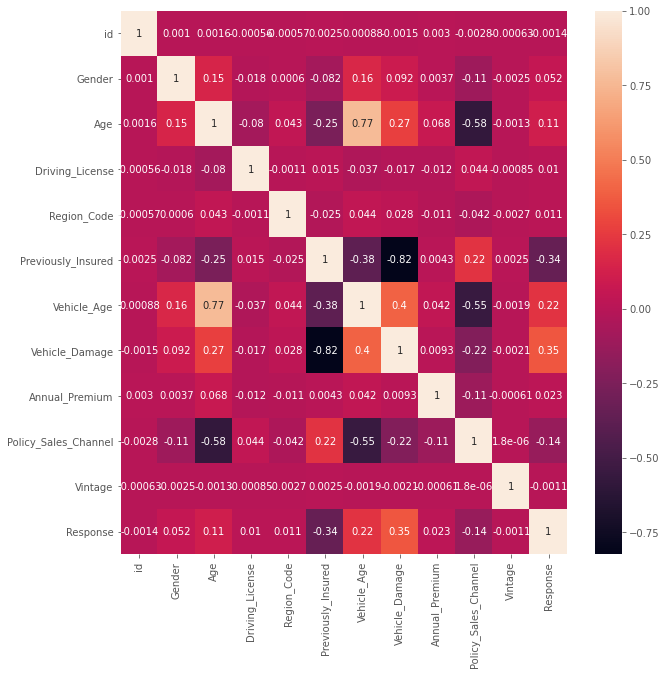

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [22]:
scalar=MinMaxScaler()

In [23]:
train['Age']=scalar.fit_transform(train[['Age']])
test['Age']=scalar.fit_transform(test[['Age']])

In [24]:
train['Vintage']=scalar.fit_transform(train[['Vintage']])
test['Vintage']=scalar.fit_transform(test[['Vintage']])

In [25]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,0.369231,1,28.0,0,2,1,40454.0,26.0,0.716263,1
1,2,1,0.861538,1,3.0,0,1,0,33536.0,26.0,0.598616,0
2,3,1,0.415385,1,28.0,0,2,1,38294.0,26.0,0.058824,1
3,4,1,0.015385,1,11.0,1,0,0,28619.0,152.0,0.667820,0
4,5,0,0.138462,1,41.0,1,0,0,27496.0,152.0,0.100346,0


In [26]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,0.076923,1,11.0,1,0,0,35786.0,152.0,0.148789
1,381111,1,0.307692,1,28.0,0,1,1,33762.0,7.0,0.349481
2,381112,1,0.415385,1,28.0,0,1,1,40050.0,124.0,0.653979
3,381113,1,0.061538,1,27.0,1,0,1,37356.0,152.0,0.612457
4,381114,1,0.107692,1,28.0,1,0,0,59097.0,152.0,0.993080


In [27]:
scalar=StandardScaler()

In [28]:
train['Annual_Premium']=scalar.fit_transform(train[['Annual_Premium']])
test['Annual_Premium']=scalar.fit_transform(test[['Annual_Premium']])

In [29]:
train=train.drop(['id'],axis=1)

# **Modeling**

In [30]:
X=train.drop(['Response'],axis=1)
y=train['Response']

In [31]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

#**Handling imabalanced data**

In [33]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

Before OverSampling, counts of label '1': 46710
Before OverSampling, counts of label '0': 334399 



In [34]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [35]:
sm = SMOTE(random_state = 2) 
X, y = sm.fit_sample(X, y.ravel()) 
  
print('After OverSampling, the shape of X: {}'.format(X.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y.shape))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of X: (668798, 10)
After OverSampling, the shape of y: (668798,) 



In [36]:
print("After OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y == 0)))

After OverSampling, counts of label '1': 334399
After OverSampling, counts of label '0': 334399


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix,roc_auc_score

In [44]:
def model_error(model,X_test,y_test):
    predict = model.predict(X_test)
    print("\nAccuracy: ",accuracy_score(y_test,predict))
    print("\nClassification Report: ",classification_report(y_test,predict))
    print("\nConfusion Matrix: \n",confusion_matrix(y_test,predict))
    print("\nROC_AUC_Score: ",roc_auc_score(y_test,predict))

    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(model, X_test, y_test,ax=ax,cmap='YlOrBr',normalize='all')
    plt.title("Confusion Matrix")
    #skplt.metrics.plot_confusion_matrix(y_test, predict,figsize=(10,8),cmap='YlOrBr',text_fontsize='medium')
    plt.show()

In [45]:
base_model = RandomForestClassifier(n_estimators = 10)
base_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy:  0.8983776913875599

Classification Report:                precision    recall  f1-score   support

           0       0.91      0.89      0.90     67100
           1       0.89      0.91      0.90     66660

    accuracy                           0.90    133760
   macro avg       0.90      0.90      0.90    133760
weighted avg       0.90      0.90      0.90    133760


Confusion Matrix: 
 [[59482  7618]
 [ 5975 60685]]

ROC_AUC_Score:  0.8984169974374486


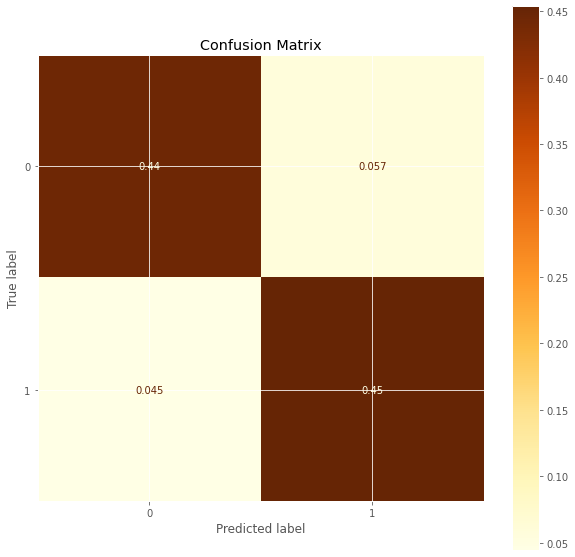

In [46]:
model_error(base_model,X_test,y_test)